# Gaussian Code Exercise

Read through the code below and fill out the TODOs. You'll find a cell at the end of the Jupyter notebook containing unit tests. After you've run the code cell with the Gaussian class, you can run the final cell to check that your code functions as expected.

For this exercise, you will use a file called 'numbers.txt', which is read in by the read_data_file() method. 


probability density function:

$$\displaystyle f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x - \mu)^2/2\sigma^2}$$

- $\mu$ is the mean
- $\sigma$ is the standard deviation
- $\sigma^2$ is the variance

In [2]:
import math
import matplotlib.pyplot as plt

class Gaussian():
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu = 0, sigma = 1): # constructor
        self.mean = mu
        self.stdev = sigma
        self.data = []
        # reserve underscore double underscore method - dunder method
        

    def calculate_mean(self): # a function inside a class is method
        """Method to calculate the mean of the data set.
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set

        """
        self.mean = sum(self.data) / len(self.data)
        return self.mean
        # TODO: Calculate the mean of the data set. Remember that the data set is stored in self.data
        # Change the value of the mean attribute to be the mean of the data set
        # Return the mean of the data set           
        # pass

    def calculate_stdev(self, sample=True):
        """Method to calculate the standard deviation of the data set.
        
        Args: 
            sample (bool): whether the data represents a sample or population
        
        Returns: 
            float: standard deviation of the data set
    
        """
       
        # TODO:
        #   Calculate the standard deviation of the data set
        #   
        #   The sample variable determines if the data set contains a sample or a population
        #   If sample = True, this means the data is a sample. 
        #   Keep the value of sample in mind for calculating the standard deviation
        #
        #   Make sure to update self.stdev and return the standard deviation as well

        # when sample : N-1
        # population : N

        # if sample == True:
            # sample formula
        # else:
            # populationformula
        n = 1 if sample else 0

        variance = sum([(x-self.mean) ** 2 for x in self.data])/(len(self.data)-n)
        stdev = math.sqrt(variance)

        self.stdev = stdev
        return stdev

    def read_data_file(self, file_name, sample=True):
        """Method to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute. 
        After reading in the file, the mean and standard deviation are calculated
                
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
        with open(file_name, 'r') as fp:
            self.data_list = []
            line = fp.readline()
            while line:
                self.data_list.append(int(line))
                line = fp.readline()


        # TODO:
        # Open a file containig the data and append them to data_list.
        
    
        # TODO: 
        #   Update the self.data attribute with the data_list
        self.data = self.data_list
        #   Update self.mean with the mean of the data_list. 
        self.mean = self.calculate_mean()
        #       You can use the calculate_mean() method with self.calculate_mean()
        #   Update self.stdev with the standard deviation of the data_list. Use the 
        #       calcaulte_stdev() method.

        self.stdev = self.calculate_stdev()

    def plot_histogram(self):
        """Method to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
        
        # TODO: Plot a histogram of the data_list using the matplotlib package.
        #       Be sure to label the x and y axes and also give the chart a title
        plt.hist(self.data, density=1)
        plt.xlabel('Probability')
        plt.ylabel('Frequency')
        plt.title('Histogram')

    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        
        # TODO: Calculate the probability density function of the Gaussian distribution
        #       at the value x. You'll need to use self.stdev and self.mean to do the calculation
        return (1.0/(self.stdev*math.sqrt(2*math.pi)))*math.exp(-0.5*((x-self.mean)/self.stdev)**2)

    def plot_histogram_pdf(self, n_spaces = 50):
        """Method to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        
        Args:
            n_spaces (int): number of data points 
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
        
        #TODO: Nothing to do for this method. Try it out and see how it works.
        
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y

In [3]:
gaussian = Gaussian()
gaussian.read_data_file('numbers.txt')

In [4]:
gaussian.data

[1, 3, 99, 100, 120, 32, 330, 23, 76, 44, 31]

In [5]:
gaussian.mean

78.0909090909091

In [6]:
gaussian.stdev

92.87459776004906

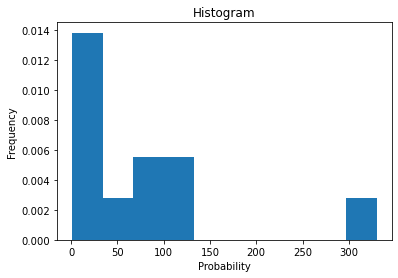

In [7]:
gaussian.plot_histogram()

In [7]:
gaussian.pdf(1)

0.003043694128015039

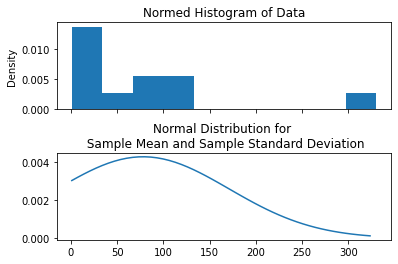

([1.0,
  7.58,
  14.16,
  20.740000000000002,
  27.32,
  33.9,
  40.480000000000004,
  47.06,
  53.64,
  60.22,
  66.8,
  73.38,
  79.96000000000001,
  86.54,
  93.12,
  99.7,
  106.28,
  112.86,
  119.44,
  126.02,
  132.6,
  139.18,
  145.76,
  152.34,
  158.92000000000002,
  165.5,
  172.08,
  178.66,
  185.24,
  191.82,
  198.4,
  204.98,
  211.56,
  218.14000000000001,
  224.72,
  231.3,
  237.88,
  244.46,
  251.04,
  257.62,
  264.2,
  270.78000000000003,
  277.36,
  283.94,
  290.52,
  297.1,
  303.68,
  310.26,
  316.84000000000003,
  323.42],
 [0.003043694128015039,
  0.0032199635775976665,
  0.003389385629106679,
  0.003549858809298968,
  0.0036993144412822716,
  0.0038357605437130374,
  0.003957325730527453,
  0.004062301768846044,
  0.004149183447609647,
  0.004216704458941581,
  0.004263868097796145,
  0.004289971740008139,
  0.004294624258609417,
  0.004277755775037969,
  0.0042396194054553134,
  0.004180784941175556,
  0.004102124683731816,
  0.004004791926750454,
  0.0

In [8]:
gaussian.plot_histogram_pdf()

---

## Unit Test

In [8]:
# Unit tests to check your solution

import unittest

class TestGaussianClass(unittest.TestCase):
    def setUp(self):
        self.gaussian = Gaussian(25, 2)

    def test_initialization(self): 
        self.assertEqual(self.gaussian.mean, 25, 'incorrect mean')
        self.assertEqual(self.gaussian.stdev, 2, 'incorrect standard deviation')

    def test_pdf(self):
        self.assertEqual(round(self.gaussian.pdf(25), 5), 0.19947,\
         'pdf function does not give expected result') 

    def test_meancalculation(self):
        self.gaussian.read_data_file('numbers.txt', True)
        self.assertEqual(self.gaussian.calculate_mean(),\
         sum(self.gaussian.data) / float(len(self.gaussian.data)), 'calculated mean not as expected')

    def test_stdevcalculation(self):
        self.gaussian.read_data_file('numbers.txt', True)
        self.assertEqual(round(self.gaussian.stdev, 2), 92.87, 'sample standard deviation incorrect')
        self.gaussian.read_data_file('numbers.txt', False)
        self.assertEqual(round(self.gaussian.stdev, 2), 88.55, 'population standard deviation incorrect')
                
tests = TestGaussianClass()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

...F
FAIL: test_stdevcalculation (__main__.TestGaussianClass)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Temp/ipykernel_20300/1087006374.py", line 26, in test_stdevcalculation
    self.assertEqual(round(self.gaussian.stdev, 2), 88.55, 'population standard deviation incorrect')
AssertionError: 92.87 != 88.55 : population standard deviation incorrect

----------------------------------------------------------------------
Ran 4 tests in 0.004s

FAILED (failures=1)


<unittest.runner.TextTestResult run=4 errors=0 failures=1>